In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [87]:
data = pd.read_csv('c:/fetal_health.csv')

In [88]:
data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                                 43        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   mean_value_of_long_term_variability  fetal_health  
0                                  2.4             2  
1                                 10.4             1  
2                                 13.4             1  
3                                 23.0             1  
4                                 19.9             1

EDA

In [89]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
# Checking for na
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
fetal_health                                              0
dtype: int64

In [91]:
# Checking for duplicates 
data.duplicated().sum()

14

In [92]:
data = data.drop_duplicates()

In [93]:
data['fetal_health'].value_counts()

1    1646
2     292
3     174
Name: fetal_health, dtype: int64

In [94]:
X = data.drop(['fetal_health'],axis=1)
y = data['fetal_health']

In [95]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [96]:
X_train_res, y_train_res = sm.fit_resample(X, y)

In [97]:
X_train_res.shape

(4938, 11)

In [98]:
y_train_res.shape

(4938,)

In [99]:
y_train_res.value_counts()

2    1646
1    1646
3    1646
Name: fetal_health, dtype: int64

In [100]:
data = X_train_res.join(y_train_res)
data.shape

(4938, 12)

In [101]:
X = data.iloc[:,:-1]
print(X.shape)
y = data.iloc[:,-1]
print(y.shape)

(4938, 11)
(4938,)


Removing MultiCollinearity

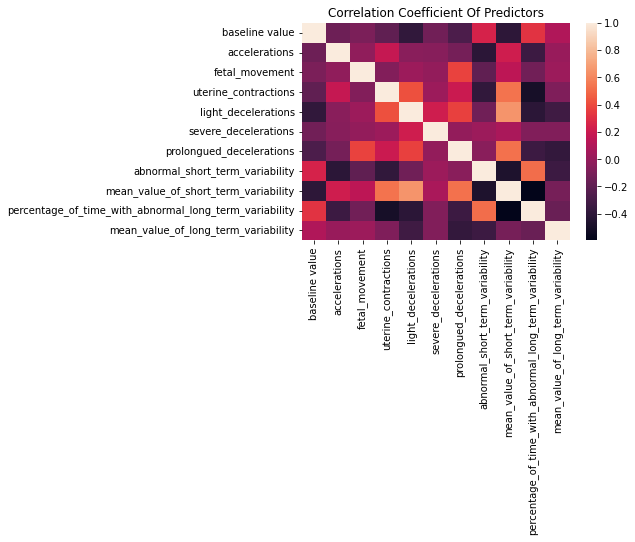

In [102]:
sns.heatmap(X.corr())
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [104]:
calc_vif(X)

variables        VIF
0                                      baseline value  47.095597
1                                       accelerations   1.958548
2                                      fetal_movement   1.402721
3                                uterine_contractions   4.064817
4                                 light_decelerations   3.400328
5                                severe_decelerations   1.085796
6                            prolongued_decelerations   3.060525
7                     abnormal_short_term_variability  23.655456
8                mean_value_of_short_term_variability   8.356538
9   percentage_of_time_with_abnormal_long_term_var...   3.696388
10                mean_value_of_long_term_variability   5.311539

 Here we will drop baseline value first as the VIF is highest

In [105]:
X = X.drop(['baseline value'],axis =1)

In [106]:
calc_vif(X)

variables       VIF
0                                      accelerations  1.687012
1                                     fetal_movement  1.364791
2                               uterine_contractions  3.513918
3                                light_decelerations  3.400033
4                               severe_decelerations  1.085752
5                           prolongued_decelerations  3.046743
6                    abnormal_short_term_variability  7.701035
7               mean_value_of_short_term_variability  7.902050
8  percentage_of_time_with_abnormal_long_term_var...  3.301506
9                mean_value_of_long_term_variability  3.490508

In [107]:
X = X.drop(['abnormal_short_term_variability'],axis =1)

In [108]:
calc_vif(X)

variables       VIF
0                                      accelerations  1.597109
1                                     fetal_movement  1.331113
2                               uterine_contractions  3.329113
3                                light_decelerations  3.109381
4                               severe_decelerations  1.075372
5                           prolongued_decelerations  2.497779
6               mean_value_of_short_term_variability  7.799824
7  percentage_of_time_with_abnormal_long_term_var...  1.223820
8                mean_value_of_long_term_variability  2.472081

In [109]:
X = X.drop(['mean_value_of_short_term_variability'],axis =1)

In [110]:
calc_vif(X)

variables       VIF
0                                      accelerations  1.348983
1                                     fetal_movement  1.330765
2                               uterine_contractions  2.974784
3                                light_decelerations  2.061443
4                               severe_decelerations  1.075369
5                           prolongued_decelerations  1.800595
6  percentage_of_time_with_abnormal_long_term_var...  1.223601
7                mean_value_of_long_term_variability  1.965794

In [112]:
data = X.join(y)

In [113]:
data.head()

accelerations  fetal_movement  uterine_contractions  light_decelerations  \
0          0.000             0.0                 0.000                0.000   
1          0.006             0.0                 0.006                0.003   
2          0.003             0.0                 0.008                0.003   
3          0.003             0.0                 0.008                0.003   
4          0.007             0.0                 0.008                0.000   

   severe_decelerations  prolongued_decelerations  \
0                   0.0                       0.0   
1                   0.0                       0.0   
2                   0.0                       0.0   
3                   0.0                       0.0   
4                   0.0                       0.0   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                                 43        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   mean_value_of_long_term_variability  fetal_health  
0                                  2.4             2  
1                                 10.4             1  
2                                 13.4             1  
3                                 23.0             1  
4                                 19.9             1

Fit Logistic regression and LDA

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
train_x, test_x, train_y, test_y = train_test_split(data.drop(columns=['fetal_health']), data['fetal_health'],train_size=0.8)

In [116]:
test_y.unique()

array([1, 2, 3], dtype=int64)

In [117]:
from sklearn.linear_model import LogisticRegression

In [120]:
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
lr_model.score(train_x,train_y)

0.66

In [124]:
lr_model.score(test_x,test_y)

0.6862348178137652

In [125]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [126]:
params = dict(penalty = ['l1','l2','elasticnet'], class_weight = [None, 'balanced'], C= np.arange(0.25, 5, 0.5), solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], multi_class=['ovr', 'multinomial'])

In [127]:
gs = GridSearchCV(LogisticRegression(), params)

In [128]:
gs.fit(train_x, train_y)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75]),
                         'class_weight': [None, 'balanced'],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [129]:
gs.best_estimator_  

LogisticRegression(C=4.75, multi_class='ovr', penalty='l1', solver='liblinear')

In [131]:
lr_model = LogisticRegression(C=4.75, multi_class='ovr', penalty='l1', solver='liblinear')
lr_model.fit(train_x, train_y)

LogisticRegression(C=4.75, multi_class='ovr', penalty='l1', solver='liblinear')

In [132]:
lr_model.score(train_x,train_y)

0.769873417721519

In [137]:
lr_model.score(test_x,test_y)

0.7864372469635628

In [138]:
ypred = lr_model.predict(test_x)

<AxesSubplot:>

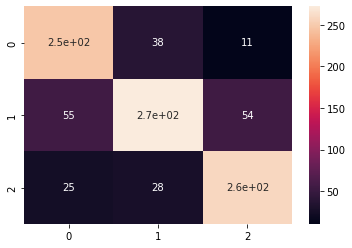

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypred,test_y)
sns.heatmap(cm,annot=True)

In [140]:
# Cross Validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model,test_x,test_y,scoring = "neg_mean_squared_error",cv =10,verbose=1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

0.7038030796925736


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [146]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [147]:
lda.score(train_x,train_y)

0.8070886075949367

In [148]:
lda.score(test_x, test_y)

0.8289473684210527

In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lr_model, X_test,y_test, scoring='accuracy', cv=cv, n_jobs=-1)

In [150]:
scores.mean()

0.8235367063492063

In [151]:
from lightgbm import LGBMClassifier

In [152]:
lg=LGBMClassifier()
lg.fit(train_x,train_y)

LGBMClassifier()

In [153]:
lg.score(train_x,train_y)

0.9977215189873417

In [154]:
lg.score(test_x,test_y)

0.9564777327935222

<AxesSubplot:>

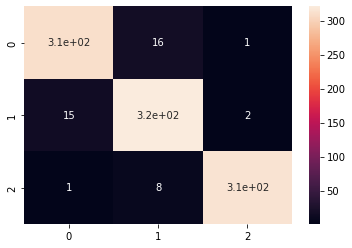

In [160]:
from sklearn.metrics import accuracy_score
y_pred=lg.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm,annot=True)

In [161]:
accuracy_score(test_y,y_pred)

0.9564777327935222

In [162]:
# Cross Validation score
scores = cross_val_score(lg,test_x,test_y,scoring = "neg_mean_squared_error",cv =10,verbose=1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.3471270879678324


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
